# 循環器疾患データセット

In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
display(warnings.filterwarnings('ignore'))
df = pd.read_csv("cardio_train.csv")

None

## データのヘッダー確認

In [2]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 年齢を日から年に変更

In [3]:
df.age = [int(i / 365) for i in df.age]
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.corr()['cardio'].sort_values()

active        -0.037286
smoke         -0.016139
height        -0.010850
alco          -0.008013
id             0.003691
gender         0.007222
gluc           0.090108
weight         0.179620
cholesterol    0.221450
age            0.239241
ap_lo          0.336796
ap_hi          0.424946
cardio         1.000000
Name: cardio, dtype: float64

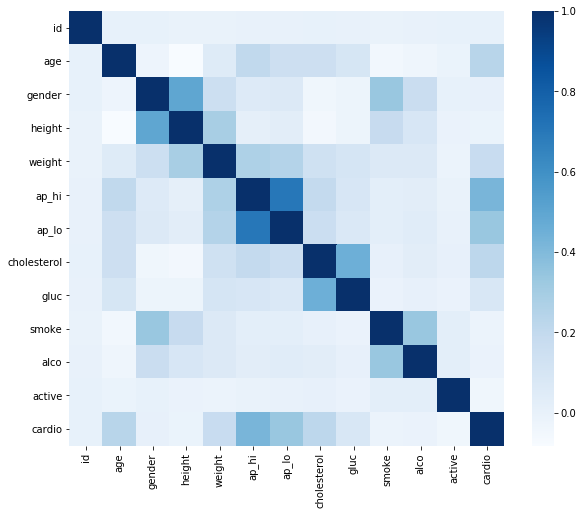

In [5]:
f, axis = pl.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="Blues", square=True, ax=axis)

In [6]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure 
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

p = figure(title="cardio", tools="save", background_fill_color="#000000")
hist, edges = np.histogram(df.cardio)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="#639921", line_color="#FFFFFF")
p.xaxis.axis_label = "x軸"
p.yaxis.axis_label = 'Pr(x)'
show(gridplot(p, ncols = 2, plot_width=400, plot_height=400, toolbar_location=None))

Loading BokehJS ...

Text(0.5, 1.0, 'non smoker')

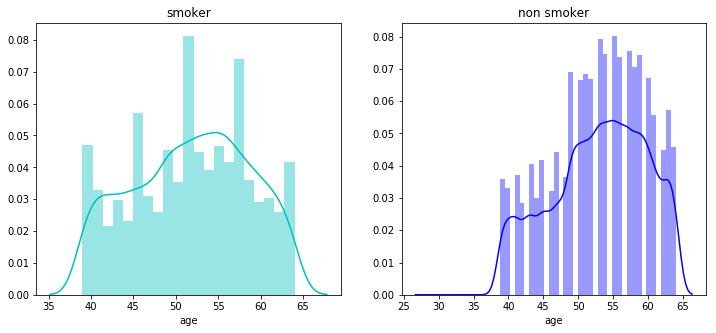

In [7]:
f = pl.figure(figsize=(12, 5))
ax = f.add_subplot(121)
sns.distplot(df[(df.smoke == 1)]["age"], color='c', ax=ax)
ax.set_title("smoker")
ax=f.add_subplot(122)
sns.distplot(df[(df.smoke == 0)]['age'], color='b', ax=ax)
ax.set_title("non smoker")

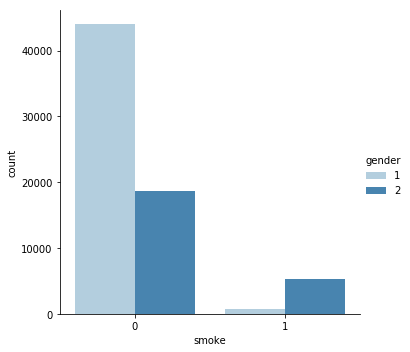

In [8]:
sns.catplot(x="smoke", kind="count", hue="gender", palette="Blues", data=df)

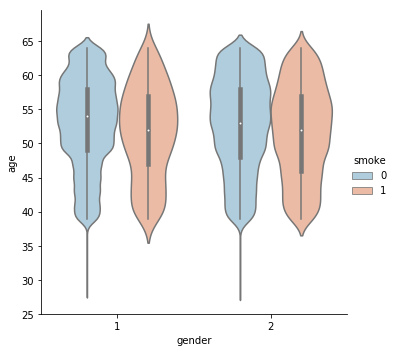

In [12]:
sns.catplot(x="gender", y="age", hue="smoke", kind="violin", data=df, palette="RdBu_r")

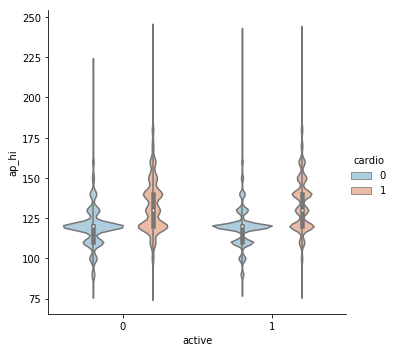

In [13]:
sns.catplot(x="active", y="ap_hi", hue="cardio", kind="violin", data=df, palette="RdBu_r")

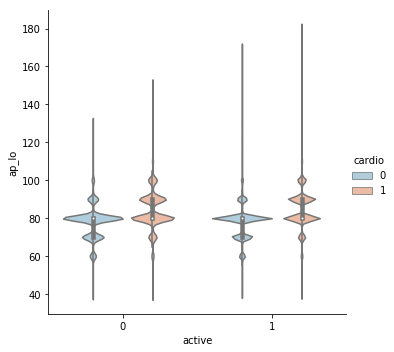

In [14]:
sns.catplot(x="active", y="ap_lo", hue="cardio", kind="violin", data=df, palette="RdBu_r")

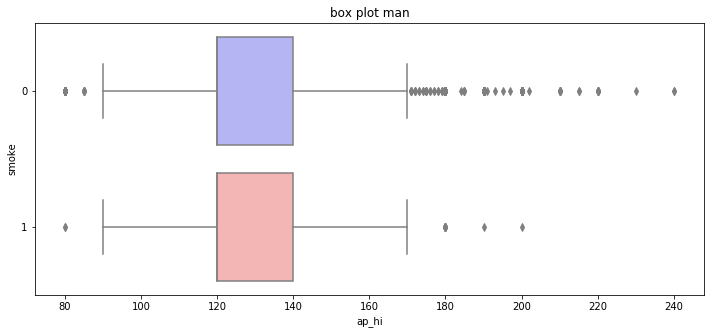

In [15]:
pl.figure(figsize=(12,5))
pl.title("box plot man")
sns.boxplot(y="smoke", x="ap_hi", data=df[(df.gender == 1)], orient="h", palette="bwr")

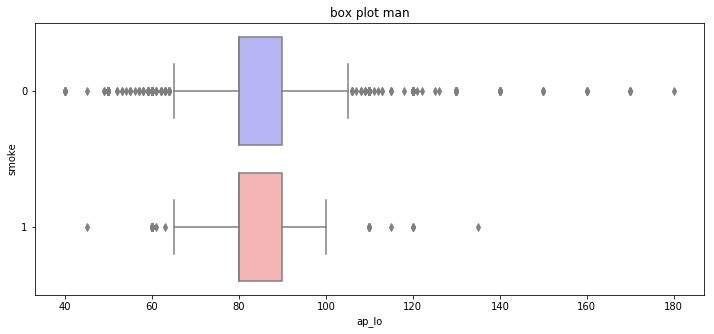

In [16]:
pl.figure(figsize=(12,5))
pl.title("box plot man")
sns.boxplot(y="smoke", x="ap_lo", data=df[(df.gender == 1)], orient="h", palette="bwr")

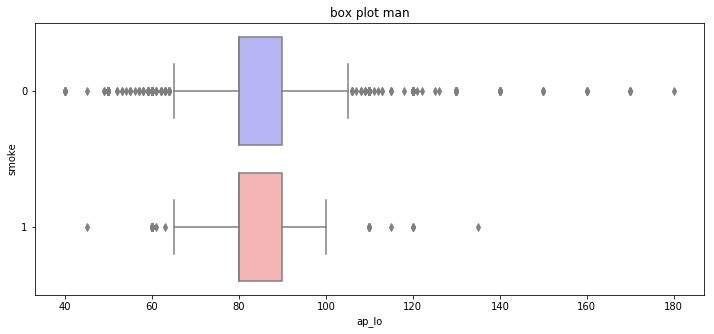

In [17]:
pl.figure(figsize=(12,5))
pl.title("box plot man")
sns.boxplot(y="smoke", x="ap_lo", data=df[(df.gender == 1)], orient="h", palette="bwr")